In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
plt.style.use('bmh')

In [2]:
#!pip install tensorflow
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import numpy.random as npr
%matplotlib inline
plt.style.use('bmh')

import cv2
import skimage
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [40]:
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.filters import prewitt_h,prewitt_v

In [110]:
from tensorflow import keras

In [4]:
# Loading Data
data_train = np.load('data_train.npy')
labels_train = np.load('labels_train.npy')

labels_names =['Stadium','Building','Traffic Sign','Forest','Flowers',
              'Street','Classroom','Bridge','Statue','Lake']

print(data_train.shape, labels_train.shape)

(270000, 3124) (3124,)


In [ ]:
#! pip install  opencv-python
#import cv2

In [5]:
ll = 5 # class
bins = 64 # bins for the histogram
print('Class ',labels_names[ll-1])

# Parameters for plotting
kk=[0,3,6]
channels=['Red','Green','Blue']
cc=['r','g','b']

# Permutes the index locations for class ll
rnd_sample = npr.permutation(np.where(labels_train==ll)[0])

# Plot the histogram for the first 10 images
# for i in range(10):
#     image = data_train[:,rnd_sample[i]].reshape((300,300,3))
#     plt.figure(figsize=(15,5))
#     plt.subplot(1,2,1); plt.imshow(image); plt.axis('off')
#     plt.subplot(1,2,2)
#     for j in range(3):
#         channel = image[:,:,j]
#         hist = cv2.calcHist([channel], [0], None, [bins], [0, 256])
#         plt.plot(hist,label=channels[j],c=cc[j]); plt.xlim([0, bins])
#         plt.ylabel('# of Pixels')
#     plt.xlabel('Bins');plt.legend();plt.show();

Class  Flowers


In [12]:
X_train, X_test, y_train, y_test = train_test_split(data_train.transpose(), labels_train, test_size=0.20)

#X_train = X_train.transpose()
#X_test = X_test.transpose()
#X_train_T = X_train.transpose()
#X_test_T = X_test.transpose()

features_train = []
for i in range(X_train.shape[0]):
    image = X_train[i,:].reshape((300,300,3))
    f_hist=[]
    for j in range(3):
        channel = image[:,:,j]
        hist = cv2.calcHist([channel], [0], None, [32], [0, 256])
        if j ==0:
            f_hist=hist
        else:
            f_hist=np.vstack((f_hist,hist))
    if i==0:
        features_train = f_hist
    else:
        features_train = np.hstack((features_train, f_hist))
features_train = features_train.T
print(features_train.shape)

print(data_train.shape)


#######################################

features_test = []
for i in range(X_test.shape[0]):
    image = X_test[i,:].reshape((300,300,3))
    f_hist=[]
    for j in range(3):
        channel = image[:,:,j]
        hist = cv2.calcHist([channel], [0], None, [32], [0, 256])
        if j ==0:
            f_hist=hist
        else:
            f_hist=np.vstack((f_hist,hist))
    if i==0:
        features_test = f_hist 
    else:
        features_test = np.hstack((features_test, f_hist))
features_test = features_test.T
print(features_test.shape)

print(data_train.shape)




(2499, 96)
(270000, 3124)
(625, 96)
(270000, 3124)


In [50]:
# Obtain the Edge Detectors Features for all Samples
features_edges_train = []
for i in range(X_train.shape[0]):
    image = rgb2gray(resize(X_train[i,:].reshape((300,300,3)), (300 // 4, 300 // 4, 3),
                       anti_aliasing=True))
    edges_prewitt_horizontal = prewitt_h(image).ravel()[:,np.newaxis]
    edges_prewitt_vertical = prewitt_v(image).ravel()[:,np.newaxis]
    if i==0:
        features_edges_train = np.vstack((edges_prewitt_horizontal, edges_prewitt_vertical))
    else:
        features_edges_train = np.hstack((features_edges_train, 
                                   np.vstack((edges_prewitt_horizontal, edges_prewitt_vertical))))
features_edges_train = features_edges_train.T
features_edges_train.shape


###########################


features_edges_test = []
for i in range(X_test.shape[0]):
    image = rgb2gray(resize(X_test[i,:].reshape((300,300,3)), (300 // 4, 300 // 4, 3),
                       anti_aliasing=True))
    edges_prewitt_horizontal = prewitt_h(image).ravel()[:,np.newaxis]
    edges_prewitt_vertical = prewitt_v(image).ravel()[:,np.newaxis]
    if i==0:
        features_edges_test = np.vstack((edges_prewitt_horizontal, edges_prewitt_vertical))
    else:
        features_edges_test = np.hstack((features_edges_test, 
                                   np.vstack((edges_prewitt_horizontal, edges_prewitt_vertical))))
features_edges_test = features_edges_test.T
features_edges_test.shape

(625, 11250)

In [51]:
scaler = StandardScaler()
scaler.fit(features_edges_train)

X_train_scaled = scaler.transform(features_edges_train)
X_test_scaled = scaler.transform(features_edges_test)

gnb_edge = GaussianNB()
y_pred_gnb_edge = gnb.fit(X_train_scaled, y_train).predict(X_test_scaled)

y_pred_gnb_edge_proba = gnb.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
y_pred_gnb_edge

array([10.,  7.,  2., 10.,  9., 10.,  8.,  8.,  3.,  7.,  6.,  2., 10.,
       10.,  8.,  3., 10.,  3.,  9.,  5.,  2.,  5.,  5.,  6.,  7.,  5.,
        7.,  1.,  3.,  7.,  7.,  2.,  7.,  6.,  3.,  4.,  5., 10.,  5.,
        5.,  8., 10., 10., 10.,  2.,  6., 10., 10., 10.,  4.,  6.,  9.,
        2.,  7., 10.,  5.,  8.,  4.,  3.,  5.,  3., 10.,  1.,  9.,  4.,
        4.,  4.,  5.,  4., 10.,  9.,  1., 10.,  1.,  5.,  6.,  1.,  7.,
        4.,  8.,  4.,  7.,  2.,  9.,  4.,  4.,  5., 10., 10.,  1.,  2.,
        2.,  8.,  2.,  2.,  4.,  8.,  8., 10.,  4., 10.,  7.,  3.,  4.,
       10., 10.,  2.,  7.,  1.,  4.,  4.,  5.,  6.,  5.,  6.,  5.,  2.,
        2.,  7.,  7.,  5.,  7.,  4.,  6.,  2.,  4.,  5.,  8., 10.,  3.,
        4., 10.,  5.,  3.,  1.,  7.,  4.,  4.,  3., 10.,  2.,  7.,  7.,
        7.,  3., 10.,  1.,  1.,  4., 10., 10.,  9.,  8.,  5.,  1.,  8.,
        2., 10.,  1.,  4.,  7.,  4.,  4., 10.,  6., 10.,  4.,  2.,  2.,
        5.,  1.,  5.,  5.,  5., 10.,  4.,  9.,  6.,  6.,  5.,  4

In [52]:
y_pred_gnb_edge.shape

(625,)

In [53]:
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb_edge)
class_report_gnb = classification_report(y_test, y_pred_gnb_edge)
print(conf_matrix_gnb)
print(class_report_gnb)

[[20  4  2  1  5  0  7  0  0 12]
 [ 2 20  6  9  7  1  5  1  5  5]
 [ 1  9 14  6  9  1  6  1  3  7]
 [ 1  3  1 31  8  7  0  0  2 14]
 [ 2  2  2  8 30  4  8  1  4  6]
 [ 5  2  2 14  1 13  2  4  2 19]
 [ 4  3  6  3  7  0 32  4  2  3]
 [ 1  6  2  8  3  3  8 11  3 20]
 [ 2  7  9  7  8  5 11  0  8  4]
 [ 8  1  2 12  3  6  1  2  3 30]]
              precision    recall  f1-score   support

         1.0       0.43      0.39      0.41        51
         2.0       0.35      0.33      0.34        61
         3.0       0.30      0.25      0.27        57
         4.0       0.31      0.46      0.37        67
         5.0       0.37      0.45      0.41        67
         6.0       0.33      0.20      0.25        64
         7.0       0.40      0.50      0.44        64
         8.0       0.46      0.17      0.25        65
         9.0       0.25      0.13      0.17        61
        10.0       0.25      0.44      0.32        68

    accuracy                           0.33       625
   macro avg       

In [ ]:
# Obtain the Histogram Features for all Samples
# features = []
# for i in range(data_train.shape[1]):
#     image = data_train[:,i].reshape((300,300,3))
#     f_hist=[]
#     for j in range(3):
#         channel = image[:,:,j]
#         hist = cv2.calcHist([channel], [0], None, [32], [0, 256])
#         if j ==0:
#             f_hist=hist
#         else:
#             f_hist=np.vstack((f_hist,hist))
#     if i==0:
#         features = f_hist
#     else:
#         features = np.hstack((features, f_hist))
# features = features.T
# print(features.shape)

# print(data_train.shape

In [13]:
# X_train_hist, X_test_hist, y_train_hist, y_test_hist = train_test_split(features, labels_train, test_size = 0.20)

# scaler = StandardScaler()
# scaler.fit(X_train_hist)

# X_train_scaled = scaler.transform(X_train_hist)
# X_test_scaled = scaler.transform(X_test_hist)

# gnb = GaussianNB()
# y_pred_gnb = gnb.fit(X_train_scaled, y_train_hist).predict_proba(X_test_scaled)
# y_pred_gnb[0,:]


scaler = StandardScaler()
scaler.fit(features_train)

X_train_scaled = scaler.transform(features_train)
X_test_scaled = scaler.transform(features_test)

gnb = GaussianNB()
y_pred_gnb_proba = gnb.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)

#y_pred_gnb = gnb.fit(X_train_scaled, y_train).predict(X_test_scaled)
y_pred_gnb_proba[0,:]




array([8.52716773e-18, 1.42703623e-12, 3.07626879e-08, 9.66951913e-22,
       6.65315028e-26, 6.87204707e-01, 3.12794734e-01, 4.18168808e-10,
       5.28330933e-07, 1.73732150e-13])

In [14]:
y_pred_gnb = gnb.fit(X_train_scaled, y_train).predict(X_test_scaled)
y_pred_gnb

array([ 6., 10.,  3., 10.,  5.,  3., 10.,  5., 10.,  5.,  6.,  9.,  3.,
        2., 10.,  7.,  9., 10.,  4.,  7.,  8.,  2.,  1.,  4.,  2.,  4.,
        9.,  4.,  7.,  4., 10.,  6., 10.,  5.,  4.,  6.,  4.,  8.,  4.,
        7.,  3.,  4.,  1., 10.,  3.,  6.,  8.,  7.,  6.,  4.,  6.,  7.,
        6.,  5.,  8.,  6.,  4.,  4.,  6.,  5.,  8., 10., 10., 10.,  4.,
        5.,  4.,  4.,  4.,  7.,  7.,  8., 10.,  8.,  4.,  7.,  4.,  7.,
        4.,  7.,  7.,  7.,  6.,  9.,  6.,  4.,  7.,  4.,  7.,  6.,  2.,
        8.,  5.,  2.,  4.,  4.,  7.,  4.,  3.,  1.,  3.,  4.,  4.,  6.,
       10.,  6.,  3.,  7., 10.,  4.,  4.,  3.,  4.,  5.,  6.,  7.,  1.,
        7.,  6.,  7.,  8.,  5.,  4.,  4., 10.,  4.,  8., 10.,  9.,  2.,
        4., 10.,  5., 10., 10.,  5.,  6.,  4.,  3.,  7.,  9.,  5.,  7.,
        4.,  3.,  4.,  5.,  7.,  4.,  4.,  4.,  3.,  4.,  5.,  6., 10.,
        3.,  7.,  7.,  7.,  7.,  4.,  7.,  6.,  4.,  1.,  4., 10., 10.,
        4.,  5.,  7.,  4.,  7.,  4.,  4.,  2.,  6.,  4.,  5.,  4

In [15]:
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
class_report_gnb = classification_report(y_test, y_pred_gnb)
print(conf_matrix_gnb)
print(class_report_gnb)

[[ 6  0  0  9  5 10  7  6  2  6]
 [ 2  5  7 13  1 14  2  7  3  7]
 [ 3  5 10 12  6  6  4  0  2  9]
 [ 0  1  1 50  3  6  4  1  0  1]
 [ 1  1  0 29 21  3  5  0  2  5]
 [ 1  1  5  9  1 22 16  1  1  7]
 [ 0  1  3  9  3  9 34  0  4  1]
 [ 2  2  7 18  4  5  7  1  4 15]
 [ 0  3  4 15 12  9  6  2  2  8]
 [ 2  1  4 15  4  9  4  6  3 20]]
              precision    recall  f1-score   support

         1.0       0.35      0.12      0.18        51
         2.0       0.25      0.08      0.12        61
         3.0       0.24      0.18      0.20        57
         4.0       0.28      0.75      0.41        67
         5.0       0.35      0.31      0.33        67
         6.0       0.24      0.34      0.28        64
         7.0       0.38      0.53      0.44        64
         8.0       0.04      0.02      0.02        65
         9.0       0.09      0.03      0.05        61
        10.0       0.25      0.29      0.27        68

    accuracy                           0.27       625
   macro avg       

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(data_train.transpose(), labels_train, test_size=0.20)

#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [16]:
X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train = np.resize(X_train,(2499,300,300,3))
X_test = np.resize(X_test,(625,300,300,3))
y_train_new = y_train - 1
y_test_new = y_test - 1
print(y_train_new)
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_new))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test_new))

(2499, 270000)
(625, 270000)
(2499,)
(625,)
[7. 6. 1. ... 3. 3. 0.]


In [ ]:
# for image_batch, labels_batch in train_dataset:
#   print(image_batch.shape)
#   print(labels_batch.shape)
#   break

# AUTOTUNE = tf.data.AUTOTUNE

# train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# normalization_layer = layers.Rescaling(1./255)

# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))



In [17]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [18]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [19]:
num_classes = 10


model = Sequential([
  layers.Rescaling(1./255, input_shape=(300,300,3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
epochs=7
history = model.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs=epochs
)

Epoch 1/7
40/40 [==============================] - 127s 3s/step - loss: 2.4557 - accuracy: 0.1849 - val_loss: 1.9165 - val_accuracy: 0.3248
Epoch 2/7
40/40 [==============================] - 129s 3s/step - loss: 1.5842 - accuracy: 0.4622 - val_loss: 1.6242 - val_accuracy: 0.4704
Epoch 3/7
40/40 [==============================] - 130s 3s/step - loss: 1.1880 - accuracy: 0.6134 - val_loss: 1.3985 - val_accuracy: 0.5296
Epoch 4/7
40/40 [==============================] - 129s 3s/step - loss: 0.8596 - accuracy: 0.7275 - val_loss: 1.3230 - val_accuracy: 0.5552
Epoch 5/7
40/40 [==============================] - 130s 3s/step - loss: 0.5410 - accuracy: 0.8343 - val_loss: 1.4695 - val_accuracy: 0.5616
Epoch 6/7
40/40 [==============================] - 129s 3s/step - loss: 0.2873 - accuracy: 0.9200 - val_loss: 1.5115 - val_accuracy: 0.5584
Epoch 7/7
40/40 [==============================] - 137s 3s/step - loss: 0.1764 - accuracy: 0.9560 - val_loss: 1.9896 - val_accuracy: 0.5504


In [91]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(300,
                                  300,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

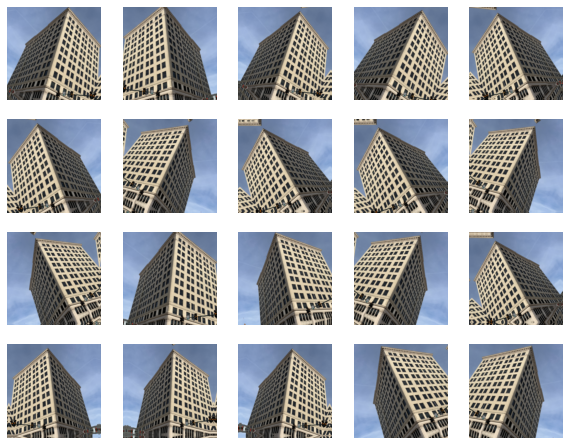

In [92]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(20):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [100]:
model_aug = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])



In [101]:
model_aug.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [103]:
epochs=60
history = model_aug.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs=epochs
)

Epoch 1/60
40/40 [==============================] - 176s 4s/step - loss: 2.2215 - accuracy: 0.1681 - val_loss: 2.1899 - val_accuracy: 0.2144
Epoch 2/60
40/40 [==============================] - 176s 4s/step - loss: 1.7930 - accuracy: 0.3790 - val_loss: 1.6402 - val_accuracy: 0.4592
Epoch 3/60
40/40 [==============================] - 177s 4s/step - loss: 1.5141 - accuracy: 0.4850 - val_loss: 1.5856 - val_accuracy: 0.4016
Epoch 4/60
40/40 [==============================] - 178s 4s/step - loss: 1.3831 - accuracy: 0.5246 - val_loss: 1.4396 - val_accuracy: 0.5296
Epoch 5/60
40/40 [==============================] - 174s 4s/step - loss: 1.2976 - accuracy: 0.5642 - val_loss: 1.6897 - val_accuracy: 0.4752
Epoch 6/60
40/40 [==============================] - 175s 4s/step - loss: 1.2073 - accuracy: 0.5838 - val_loss: 1.3937 - val_accuracy: 0.5536
Epoch 7/60
40/40 [==============================] - 177s 4s/step - loss: 1.1234 - accuracy: 0.6126 - val_loss: 1.2115 - val_accuracy: 0.5952
Epoch 8/60
40

Epoch 59/60
40/40 [==============================] - 169s 4s/step - loss: 0.1190 - accuracy: 0.9616 - val_loss: 1.7801 - val_accuracy: 0.7040
Epoch 60/60
40/40 [==============================] - 173s 4s/step - loss: 0.1048 - accuracy: 0.9648 - val_loss: 1.5731 - val_accuracy: 0.7344


In [104]:
# this gives the prediction confidence
predictions = model_aug.predict(X_test)
score = tf.nn.softmax(predictions[0])

In [105]:
scores_cnn = tf.nn.softmax(predictions)

In [106]:
scores_cnn_np = np.array(scores_cnn)

In [107]:
final_scores = (0.66 / (0.66 + 0.27 + 0.33)) * scores_cnn_np + 0*(0.27 / (0.66 + 0.27 + 0.33)) * y_pred_gnb_proba + 0*(0.33 / (0.66 + 0.27 + 0.33)) * y_pred_gnb_edge_proba
final_scores = scores_cnn_np
num_pred = final_scores.shape[0]
final_predictions = np.zeros(num_pred)
#final_scores.shape
for i in range(num_pred):
    index = np.where(final_scores[i,:] == np.amax(final_scores[i,:]))
    #print(index)
    final_predictions[i] = index[0] + 1
    
#final_predictions

conf_matrix_boost = confusion_matrix(y_test, final_predictions)
class_report_boost = classification_report(y_test, final_predictions)
print(conf_matrix_boost)
print(class_report_boost)

[[41  0  2  0  1  0  1  4  0  2]
 [ 3 36  3  4  0  0  0  7  6  2]
 [ 1  3 47  0  1  1  0  3  1  0]
 [ 0  2  0 61  0  0  0  3  0  1]
 [ 0  1  5  3 56  0  0  1  0  1]
 [ 2  0  1  3  1 47  1  3  3  3]
 [ 0  1  2  0  0  1 59  0  1  0]
 [ 0  6  5  7  1  8  2 33  2  1]
 [ 2  9  6  1  1  3  0  6 33  0]
 [ 3  1  3  6  0  4  0  5  0 46]]
              precision    recall  f1-score   support

         1.0       0.79      0.80      0.80        51
         2.0       0.61      0.59      0.60        61
         3.0       0.64      0.82      0.72        57
         4.0       0.72      0.91      0.80        67
         5.0       0.92      0.84      0.88        67
         6.0       0.73      0.73      0.73        64
         7.0       0.94      0.92      0.93        64
         8.0       0.51      0.51      0.51        65
         9.0       0.72      0.54      0.62        61
        10.0       0.82      0.68      0.74        68

    accuracy                           0.73       625
   macro avg       

In [ ]:
final_scores[0,:]

In [108]:
model_aug.save_weights('./checkpoints/my_checkpoint')

In [112]:
num_classes = 10

model_new = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

model_new.load_weights('./checkpoints/my_checkpoint')

predictions = model_new.predict(X_test)

scores_cnn = tf.nn.softmax(predictions)
scores_cnn_np = np.array(scores_cnn)

final_scores = (0.66 / (0.66 + 0.27 + 0.33)) * scores_cnn_np + 0*(0.27 / (0.66 + 0.27 + 0.33)) * y_pred_gnb_proba + 0*(0.33 / (0.66 + 0.27 + 0.33)) * y_pred_gnb_edge_proba
final_scores = scores_cnn_np
num_pred = final_scores.shape[0]
final_predictions = np.zeros(num_pred)
#final_scores.shape
for i in range(num_pred):
    index = np.where(final_scores[i,:] == np.amax(final_scores[i,:]))
    #print(index)
    final_predictions[i] = index[0] + 1
    
#final_predictions

conf_matrix_boost = confusion_matrix(y_test, final_predictions)
class_report_boost = classification_report(y_test, final_predictions)
print(conf_matrix_boost)
print(class_report_boost)

[[41  0  2  0  1  0  1  4  0  2]
 [ 3 36  3  4  0  0  0  7  6  2]
 [ 1  3 47  0  1  1  0  3  1  0]
 [ 0  2  0 61  0  0  0  3  0  1]
 [ 0  1  5  3 56  0  0  1  0  1]
 [ 2  0  1  3  1 47  1  3  3  3]
 [ 0  1  2  0  0  1 59  0  1  0]
 [ 0  6  5  7  1  8  2 33  2  1]
 [ 2  9  6  1  1  3  0  6 33  0]
 [ 3  1  3  6  0  4  0  5  0 46]]
              precision    recall  f1-score   support

         1.0       0.79      0.80      0.80        51
         2.0       0.61      0.59      0.60        61
         3.0       0.64      0.82      0.72        57
         4.0       0.72      0.91      0.80        67
         5.0       0.92      0.84      0.88        67
         6.0       0.73      0.73      0.73        64
         7.0       0.94      0.92      0.93        64
         8.0       0.51      0.51      0.51        65
         9.0       0.72      0.54      0.62        61
        10.0       0.82      0.68      0.74        68

    accuracy                           0.73       625
   macro avg       

In [78]:
predictions

array([[-3.136045  , -5.9468374 ,  2.7347894 , ...,  5.821068  ,
         3.0815024 ,  5.2892666 ],
       [11.446618  ,  5.0617146 , -1.0556151 , ...,  2.4322772 ,
         0.81584865,  2.0088284 ],
       [ 5.363002  ,  6.3007727 , 11.208523  , ...,  1.274816  ,
         1.3031105 , -3.0681343 ],
       ...,
       [ 5.803251  ,  1.5602068 ,  2.0253725 , ..., -0.5515111 ,
         5.504461  , -3.5772755 ],
       [ 0.65804535,  2.5959222 ,  1.0120519 , ...,  5.331485  ,
         2.2213247 , -3.6430578 ],
       [11.057547  ,  1.7556481 , -3.1227565 , ...,  2.0077007 ,
        -2.0365849 , -6.54081   ]], dtype=float32)

In [ ]:
y_test_hist

In [ ]:
##### Histogram as features
#Obtain the Histogram Features for all Samples
features = []
for i in range(data_train.shape[1]):
    image = data_train[:,i].reshape((300,300,3))
    f_hist=[]
    for j in range(3):
        channel = image[:,:,j]
        hist = cv2.calcHist([channel], [0], None, [32], [0, 256])
        if j ==0:
            f_hist=hist
        else:
            f_hist=np.vstack((f_hist,hist))
    if i==0:
        features = f_hist
    else:
        features = np.hstack((features, f_hist))
features = features.T
print(features.shape)

In [ ]:
X_train_hist, X_test_hist, y_train_hist, y_test_hist = train_test_split(features, labels_train, test_size = 0.20)

scaler = StandardScaler()
scaler.fit(X_train_hist)

X_train_scaled = scaler.transform(X_train_hist)
X_test_scaled = scaler.transform(X_test_hist)

gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train_scaled, y_train_hist).predict(X_test_scaled)
y_pred_gnb

In [ ]:
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
class_report_gnb = classification_report(y_test, y_pred_gnb)
print(conf_matrix_gnb)
print(class_report_gnb)